In [8]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#3a Read data from ratings_small.csv
data_path = os.path.expanduser('ratings_small.csv') 
dataReader = Reader(line_format='user item rating timestamp', sep=',',skip_lines = 1) 
data_df = Dataset.load_from_file(data_path, reader = dataReader)

In [12]:
#3c&3d Probabilistic Matrix Factorization
algorthm = SVD(biased= False)
cross_validate(algorthm, data_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0048  1.0101  1.0042  1.0114  1.0054  1.0072  0.0030  
MAE (testset)     0.7766  0.7792  0.7740  0.7797  0.7772  0.7773  0.0021  
Fit time          7.03    7.72    7.05    7.27    6.62    7.14    0.36    
Test time         0.29    0.14    0.21    0.29    0.21    0.23    0.06    


{'test_rmse': array([1.00483249, 1.01011826, 1.00417527, 1.0114064 , 1.00536563]),
 'test_mae': array([0.77660272, 0.77918576, 0.77396122, 0.77973194, 0.77720838]),
 'fit_time': (7.025426149368286,
  7.720258951187134,
  7.0521979331970215,
  7.266499757766724,
  6.615713834762573),
 'test_time': (0.29450535774230957,
  0.14458751678466797,
  0.20529985427856445,
  0.29246997833251953,
  0.21261000633239746)}

In [13]:
# User based Collaborative Filtering
algorthm = KNNBasic(sim_options = {
    'user_based': True
})
cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9668  0.9794  0.9677  0.9573  0.9732  0.9689  0.0073  
MAE (testset)     0.7438  0.7491  0.7462  0.7365  0.7485  0.7448  0.0046  
Fit time          0.39    0.50    0.40    0.32    0.31    0.38    0.07    
Test time         2.61    2.30    2.64    2.75    2.85    2.63    0.19    


{'test_rmse': array([0.9668327 , 0.97936052, 0.9677199 , 0.95733736, 0.97322168]),
 'test_mae': array([0.74383709, 0.74910539, 0.74618514, 0.73646868, 0.74849381]),
 'fit_time': (0.39319586753845215,
  0.4956350326538086,
  0.3988778591156006,
  0.32468271255493164,
  0.30753636360168457),
 'test_time': (2.605677366256714,
  2.298567533493042,
  2.64274263381958,
  2.754021167755127,
  2.85304856300354)}

In [14]:
#Item based Collaborative Filtering
algorthm = KNNBasic(sim_options = {
    'user_based': False
})
cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9349  0.9379  0.9349  0.9414  0.9255  0.9349  0.0053  
MAE (testset)     0.7185  0.7239  0.7236  0.7241  0.7143  0.7209  0.0039  
Fit time          7.27    5.86    6.01    5.61    5.53    6.06    0.63    
Test time         9.88    10.02   10.00   8.78    9.55    9.65    0.47    


{'test_rmse': array([0.93489868, 0.93792635, 0.93488794, 0.94141899, 0.92547335]),
 'test_mae': array([0.71846126, 0.7238521 , 0.72362935, 0.72413456, 0.71432625]),
 'fit_time': (7.270521402359009,
  5.8574864864349365,
  6.01318359375,
  5.6127259731292725,
  5.533331394195557),
 'test_time': (9.884058475494385,
  10.022580623626709,
  10.002933979034424,
  8.779836893081665,
  9.55104923248291)}

In [17]:
#3e calculating the Impact of cosine, MSD and Pearson similarities on User-based collaborative filtering.
algorthm = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': True 
        })
perfUser_based_MSD = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

#User-based collaborative filtering. Cosine
algorthm = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': True 
        })
perfUser_based_cosine = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

#User-based collaborative filtering. Pearson.
algorthm = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': True 
        })
perfUser_based_pearson = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9652  0.9688  0.9698  0.9710  0.9687  0.0020  
MAE (testset)     0.7445  0.7449  0.7432  0.7447  0.7475  0.7450  0.0014  
Fit time          0.20    0.20    0.21    0.45    0.23    0.26    0.10    
Test time         1.84    1.52    3.85    1.96    2.01    2.24    0.83    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done co

In [16]:
#Calculating Impact of cosine, MSD and Pearson similarities on Item-based collaborative filtering. 
algorthm = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': False 
        })
perfItem_based_MSD = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

# Item-based collaborative filtering. Cosine. 
algorthm = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': False 
        })
perfItem_based_cosine = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

# Item-based collaborative filtering. Pearson. 
algorthm = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': False 
        })
perfItem_based_pearson =cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9340  0.9250  0.9307  0.9456  0.9403  0.9351  0.0072  
MAE (testset)     0.7199  0.7119  0.7172  0.7324  0.7241  0.7211  0.0069  
Fit time          5.02    5.19    5.59    5.66    5.49    5.39    0.24    
Test time         9.41    9.23    9.56    9.10    9.11    9.28    0.18    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done co

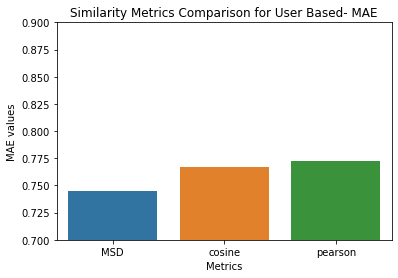

[0.744953413938263, 0.7671918980922455, 0.7725022382844344]


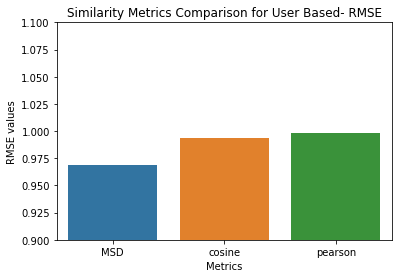

[0.9686813372576148, 0.9934461638749426, 0.9978810354286886]


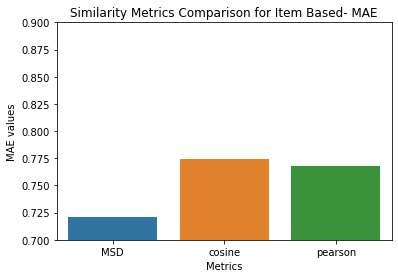

[0.7211176365332912, 0.774310959777828, 0.7680546166538844]


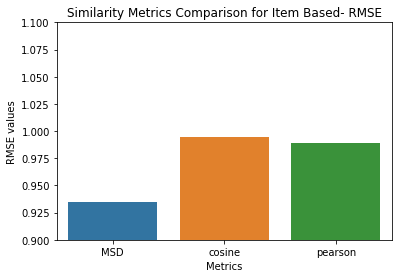

[0.9351246934759567, 0.9949863631173853, 0.9891377258682909]


In [18]:
#RMSE, MAE values for Plots cosine, MSD and Pearson similarities on Item-based & user based collaborative filtering.
valus = [np.mean(perfUser_based_MSD['test_mae']), np.mean(perfUser_based_cosine['test_mae']), np.mean(perfUser_based_pearson['test_mae'])]
similarity_metrics = np.array(['MSD', 'cosine', 'pearson'])
seris = pd.Series(name='MAE', data=valus)
bp = sns.barplot(similarity_metrics, seris.values)
bp.set_title("Similarity Metrics Comparison for User Based- MAE")
bp.set_ylabel('MAE values')
bp.set_xlabel('Metrics')
bp.set_ylim(.7, 0.9)
plt.show()
print(valus)

valus = [np.mean(perfUser_based_MSD['test_rmse']), np.mean(perfUser_based_cosine['test_rmse']), np.mean(perfUser_based_pearson['test_rmse'])]
similarity_metrics = np.array(['MSD', 'cosine', 'pearson'])
seris = pd.Series(name='RMSE', data=valus)
bp = sns.barplot(similarity_metrics, seris.values)
bp.set_title("Similarity Metrics Comparison for User Based- RMSE")
bp.set_ylabel('RMSE values')
bp.set_xlabel('Metrics')
bp.set_ylim(.9,1.1)
plt.show()
print(valus)

valus = [np.mean(perfItem_based_MSD['test_mae']), np.mean(perfItem_based_cosine['test_mae']), np.mean(perfItem_based_pearson['test_mae'])]
similarity_metrics = np.array(['MSD', 'cosine', 'pearson'])
seris = pd.Series(name='MAE', data=valus)
bp = sns.barplot(similarity_metrics, seris.values)
bp.set_title("Similarity Metrics Comparison for Item Based- MAE")
bp.set_ylabel('MAE values')
bp.set_xlabel('Metrics')
bp.set_ylim(.7, 0.9)
plt.show()
print(valus)

valus = [np.mean(perfItem_based_MSD['test_rmse']), np.mean(perfItem_based_cosine['test_rmse']), np.mean(perfItem_based_pearson['test_rmse'])]
similarity_metrics = np.array(['MSD', 'cosine', 'pearson'])
seris = pd.Series(name='RMSE', data=valus)
bp = sns.barplot(similarity_metrics, seris.values)
bp.set_title("Similarity Metrics Comparison for Item Based- RMSE")
bp.set_ylabel('RMSE values')
bp.set_xlabel('Metrics')
bp.set_ylim(.9,1.1)
plt.show()
print(valus)

In [19]:
#3f calculating impact of number of neighbors k value on performance of user based CF
RMSE_user_based_CFk = []
MAE_user_based_CFk = []
for i in range(1,31):
    algorthm = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': True 
        })
    print("K= ", i)
    perfUser_based_MSD = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)
    print('-----------------------------------------------------------------------')
    RMSE_user_based_CFk.append(np.mean(perfUser_based_MSD['test_rmse']))
    MAE_user_based_CFk.append(np.mean(perfUser_based_MSD['test_mae']))

K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9665  0.9775  0.9669  0.9693  0.9580  0.9677  0.0063  
MAE (testset)     0.7414  0.7504  0.7430  0.7462  0.7375  0.7437  0.0044  
Fit time          0.19    0.19    0.21    0.37    0.29    0.25    0.07    
Test time         1.48    1.61    1.61    1.68    1.48    1.57    0.08    
-----------------------------------------------------------------------
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done 

In [20]:
# calculating impact of number of neighbors k value on performance of item based CF
RMSE_item_based_CFk = []
MAE_item_based_CFk = []
for i in range(1,31):
    algorthm = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': False 
            })
    print("K= ", i)
    perfItem_based_MSD = cross_validate(algorthm, data_df, measures=['RMSE','MAE'], cv=5, verbose=True)
    print('-----------------------------------------------------------------------')
    RMSE_item_based_CFk.append(np.mean(perfItem_based_MSD['test_rmse']))
    MAE_item_based_CFk.append(np.mean(perfItem_based_MSD['test_mae']))

K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2967  1.3093  1.2963  1.3066  1.3126  1.3043  0.0067  
MAE (testset)     0.9653  0.9713  0.9623  0.9694  0.9727  0.9682  0.0039  
Fit time          3.39    3.44    3.44    3.48    3.44    3.44    0.03    
Test time         3.88    3.86    3.93    3.76    3.81    3.85    0.06    
-----------------------------------------------------------------------
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done 

In [21]:
#3g calculating Best K for User Based Collaborative filtering
minimum_RMSE_index = np.argmin(RMSE_user_based_CFk)
print("Best K value is ", minimum_RMSE_index+1)
print("Best RMSE is", np.min(RMSE_user_based_CFk))

Best K value is  2
Best RMSE is 0.9661996285879095


(0.7, 1.2)

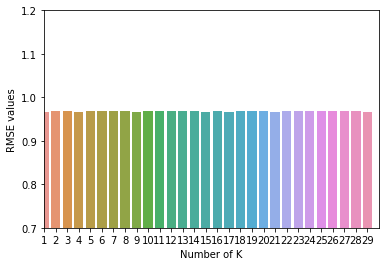

In [22]:
#RMSE Chart for User Based Collaborative filtering
rmse_series = pd.Series(name='rmse', data=RMSE_user_based_CFk)
bp = sns.barplot(rmse_series.index, rmse_series.values)
bp.set_ylabel('RMSE values')
bp.set_xlabel('Number of K')
bp.set_xlim(1, 30)
bp.set_ylim(.7, 1.2)

In [23]:
#calculating best K value for Item Based Collaborative filtering
minimum_RMSE_index = np.argmin(RMSE_item_based_CFk)
print("Best K value is ", minimum_RMSE_index+1)
print("Best RMSE is ", np.min(RMSE_item_based_CFk))

Best K value is  30
Best RMSE is  0.9375736457409205


(0.7, 1.2)

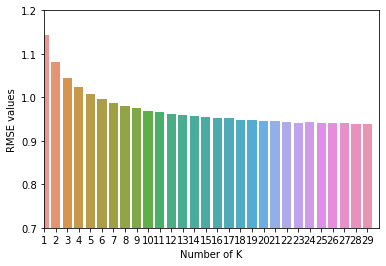

In [24]:
#RMSE Chart for Item Based Collaborative filtering
rmse_series = pd.Series(name='rmse', data=RMSE_item_based_CFk)
bp = sns.barplot(rmse_series.index, rmse_series.values)
bp.set_ylabel('RMSE values')
bp.set_xlabel('Number of K')
bp.set_xlim(1, 30)
bp.set_ylim(.7, 1.2)

(0.7, 1.2)

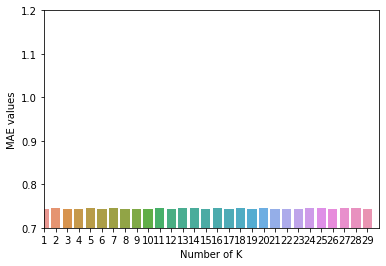

In [25]:
#MAE chart for User based Collaborative filtering
mae_series = pd.Series(name='mae', data=MAE_user_based_CFk)
bp = sns.barplot(mae_series.index, mae_series.values)
bp.set_ylabel('MAE values')
bp.set_xlabel('Number of K')
bp.set_xlim(1, 30)
bp.set_ylim(.7, 1.2)

(0.7, 1.2)

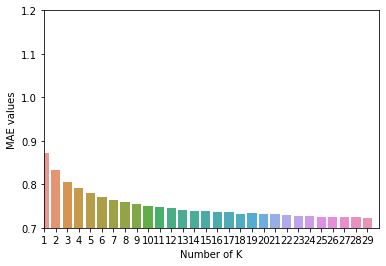

In [26]:
#MAE chart for Item based Collaborative filtering
mae_series = pd.Series(name='mae', data=MAE_item_based_CFk)
bp = sns.barplot(mae_series.index, mae_series.values)
bp.set_ylabel('MAE values')
bp.set_xlabel('Number of K')
bp.set_xlim(1, 30)
bp.set_ylim(.7, 1.2)